In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

# 4) Dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)



### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [13]:
df = pd.read_csv("/kaggle/input/diabetes/diabetes_dataset.csv")
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


In [14]:
# clean columns
def clean_col(column_name) :
    column_name = column_name.replace("race:","")
    return column_name
df.columns = [clean_col(col) for col in df.columns ]



In [15]:
df.columns

Index(['year', 'gender', 'age', 'location', 'AfricanAmerican', 'Asian',
       'Caucasian', 'Hispanic', 'Other', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

# 1-understanding data

### a ) understanding coulmns =>


In [6]:
# understanded

### b ) check datatype

In [7]:
df.info()
# age => int
# year => object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   location             100000 non-null  object 
 4   AfricanAmerican      100000 non-null  int64  
 5   Asian                100000 non-null  int64  
 6   Caucasian            100000 non-null  int64  
 7   Hispanic             100000 non-null  int64  
 8   Other                100000 non-null  int64  
 9   hypertension         100000 non-null  int64  
 10  heart_disease        100000 non-null  int64  
 11  smoking_history      100000 non-null  object 
 12  bmi                  100000 non-null  float64
 13  hbA1c_level          100000 non-null  float64
 14  blood_glucose_level  100000 non-null  int64  
 15  diabetes          

In [16]:
# 
df["age"] =df["age"].astype("int")
df["year"] =df["year"].astype("category")



### c ) Describe num data

In [9]:
df.describe()

,age,AfricanAmerican,Asian,Caucasian,Hispanic,Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### d ) Describe cat

In [10]:
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    #print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print(f"number  value of each feature is :\n {df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'gender' is: 3
number  value of each feature is :
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

**************************************************

number of uniques of 'location' is: 55
number  value of each feature is :
 location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut   

# 2 - EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


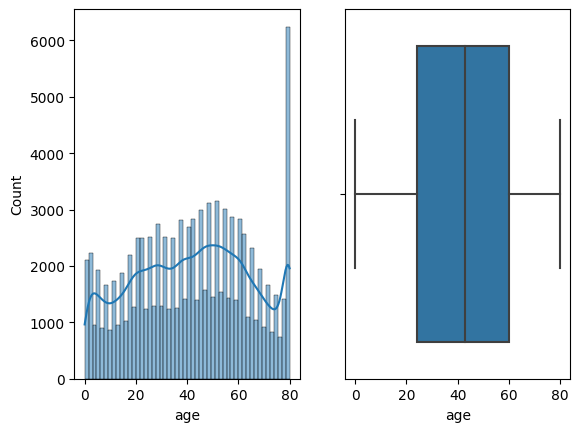

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


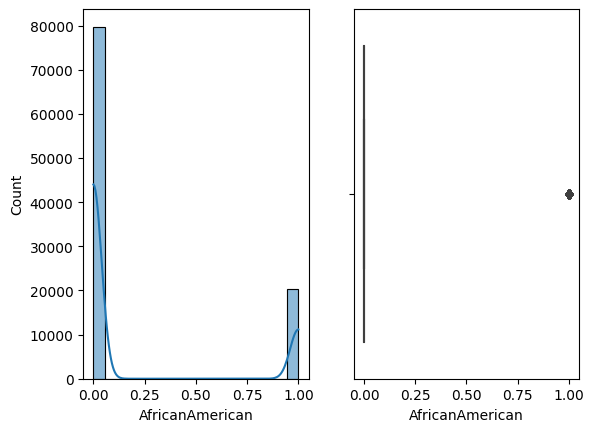

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


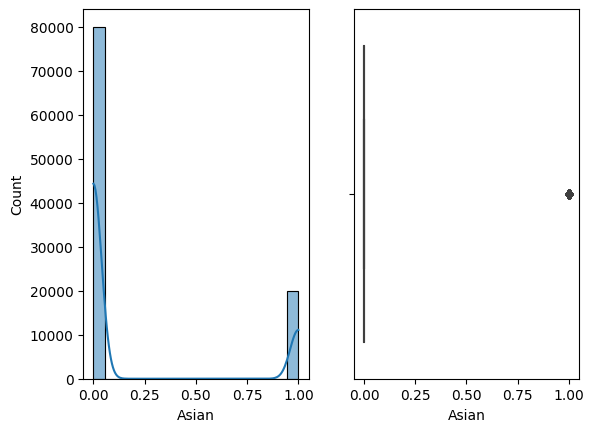

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


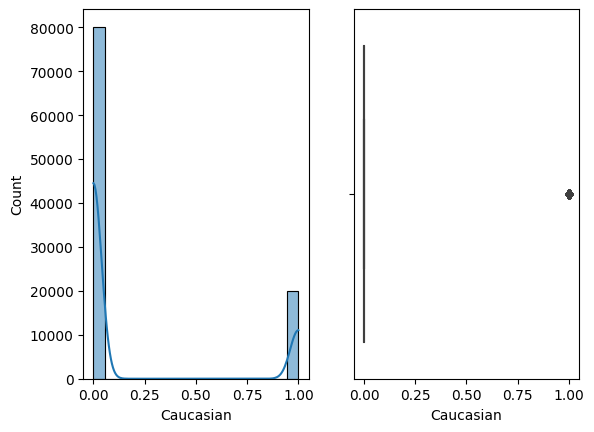

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


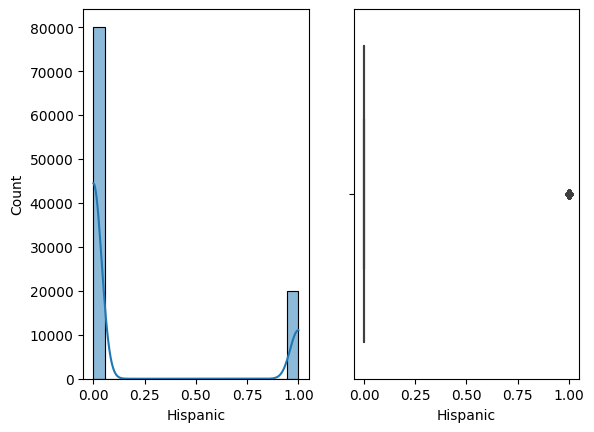

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


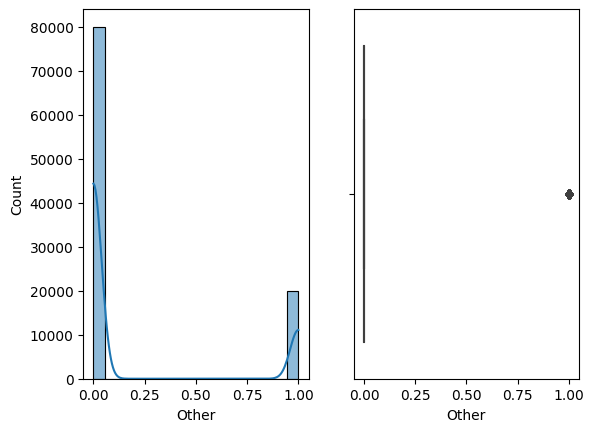

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


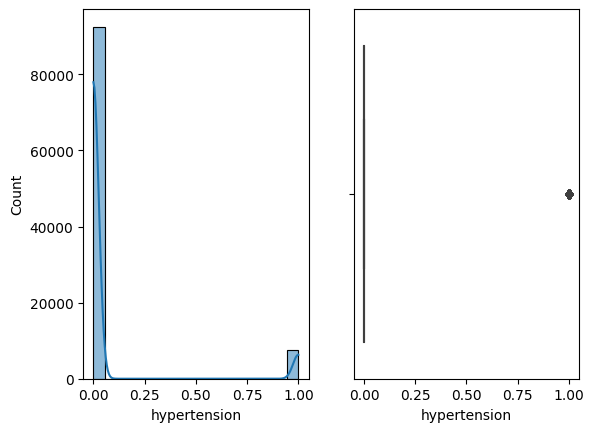

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


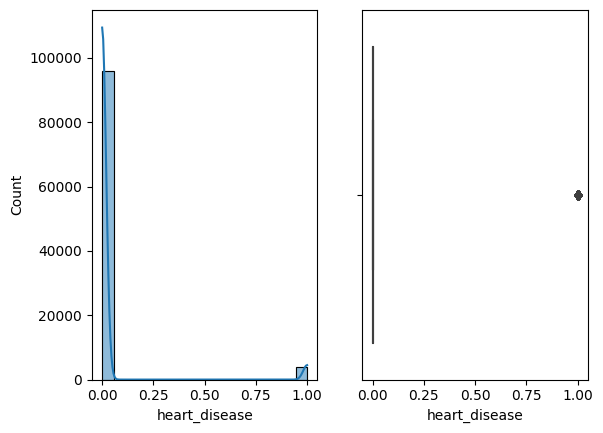

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


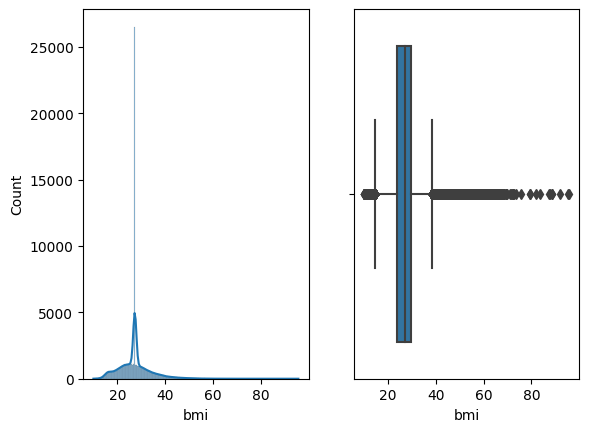

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


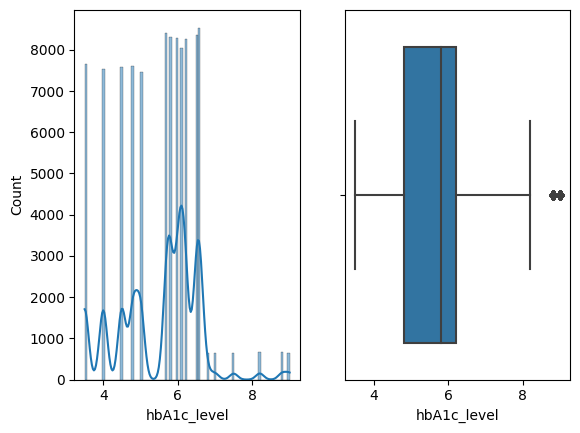

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


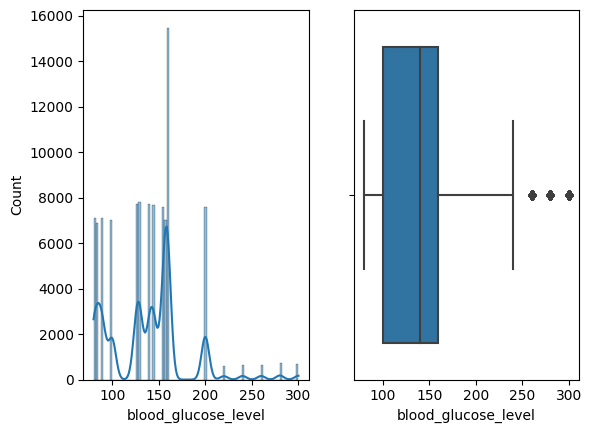

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


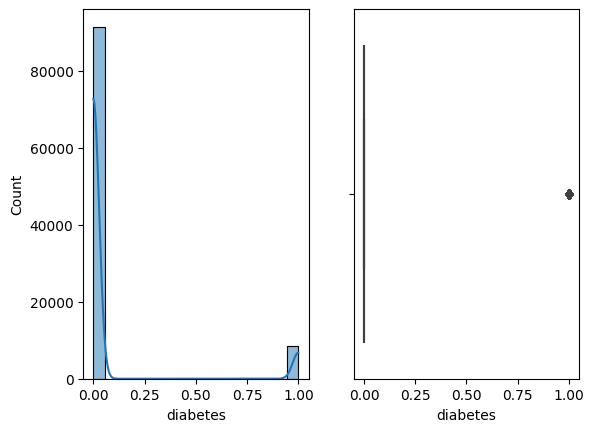

In [6]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()

In [17]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

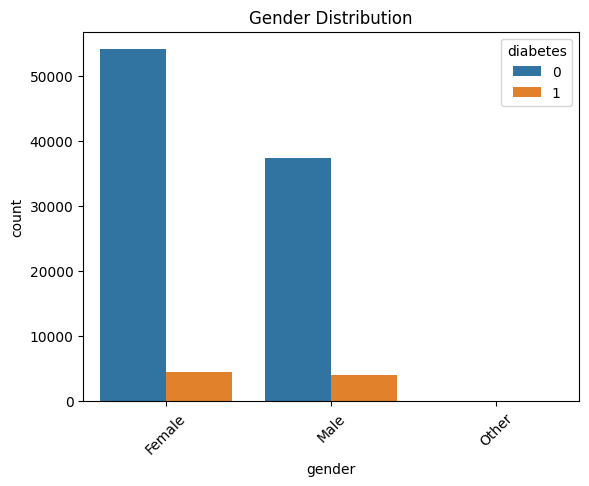

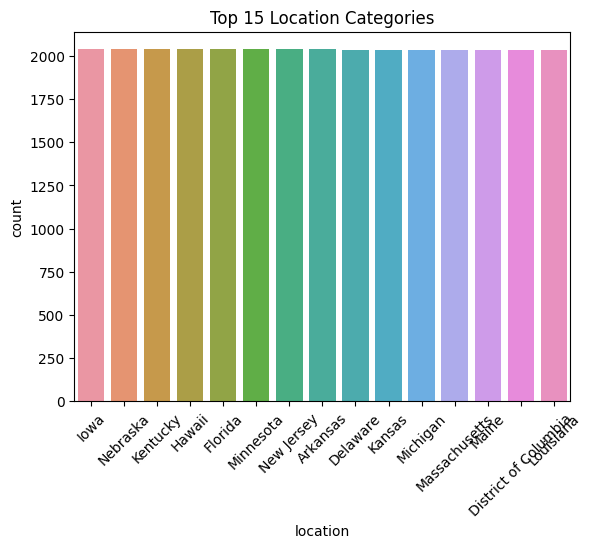

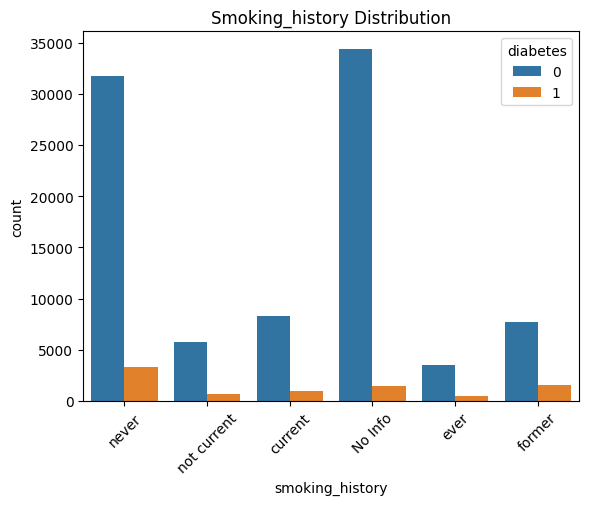

In [7]:


cat_cols = df.select_dtypes(include="O")

for col in cat_cols:
    if col == "location":
        sns.countplot(
            data=df,
            x=col,
            order=df['location'].value_counts().head(15).index
        )
        plt.title(f"Top 15 {col.capitalize()} Categories")
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.countplot(data=df, x=col,hue="diabetes")
        plt.title(f"{col.capitalize()} Distribution")
        plt.xticks(rotation=45)
        plt.show()


<Axes: >

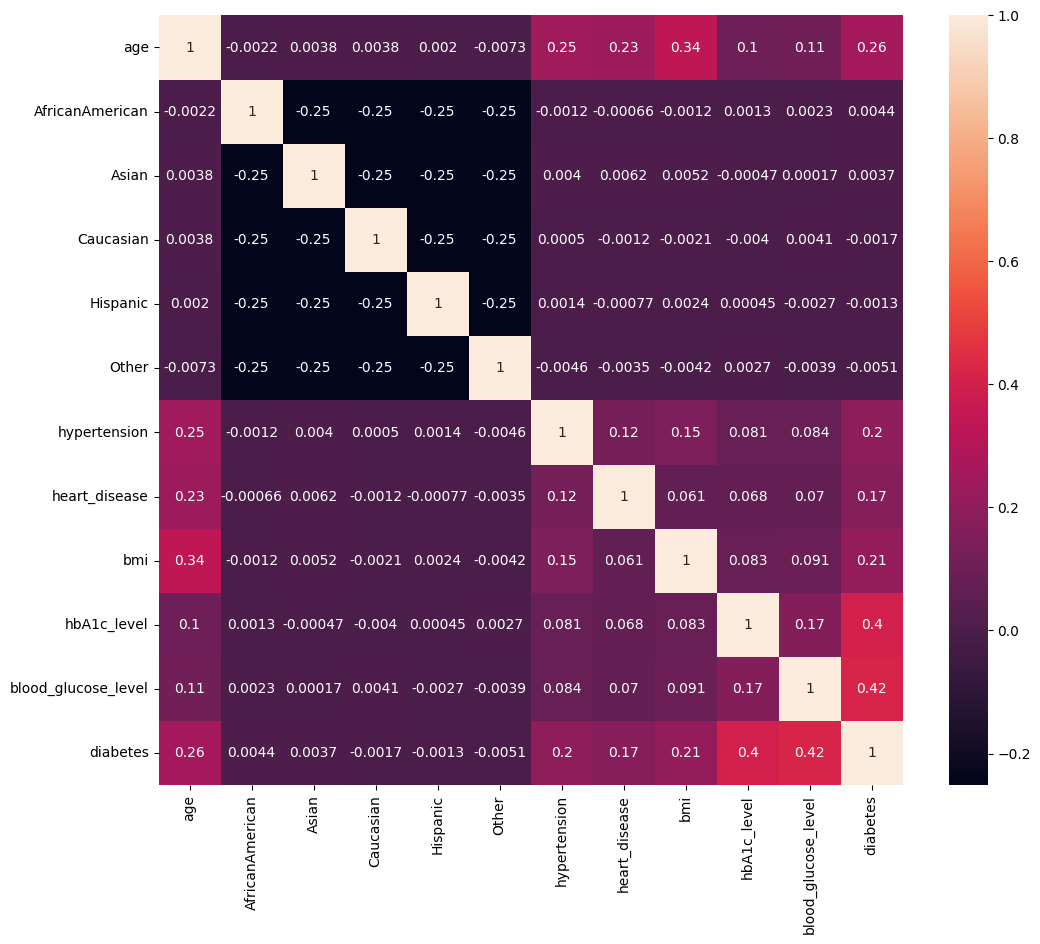

In [8]:
## bi-varaites
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

In [13]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [18]:
def smoking_status(value) :
    if value in ["never"] :
        return "No smoking"
    elif value in ["former","not current","ever"] :
        return "past smoking"
    elif value in ["current"] :
        return "Smoking"
    else :
        return "No Info"

In [19]:
df["smoking_history"] = df["smoking_history"].map(smoking_status)

In [20]:
df["smoking_history"].value_counts()

smoking_history
No Info         35816
No smoking      35095
past smoking    19803
Smoking          9286
Name: count, dtype: int64

<Axes: >

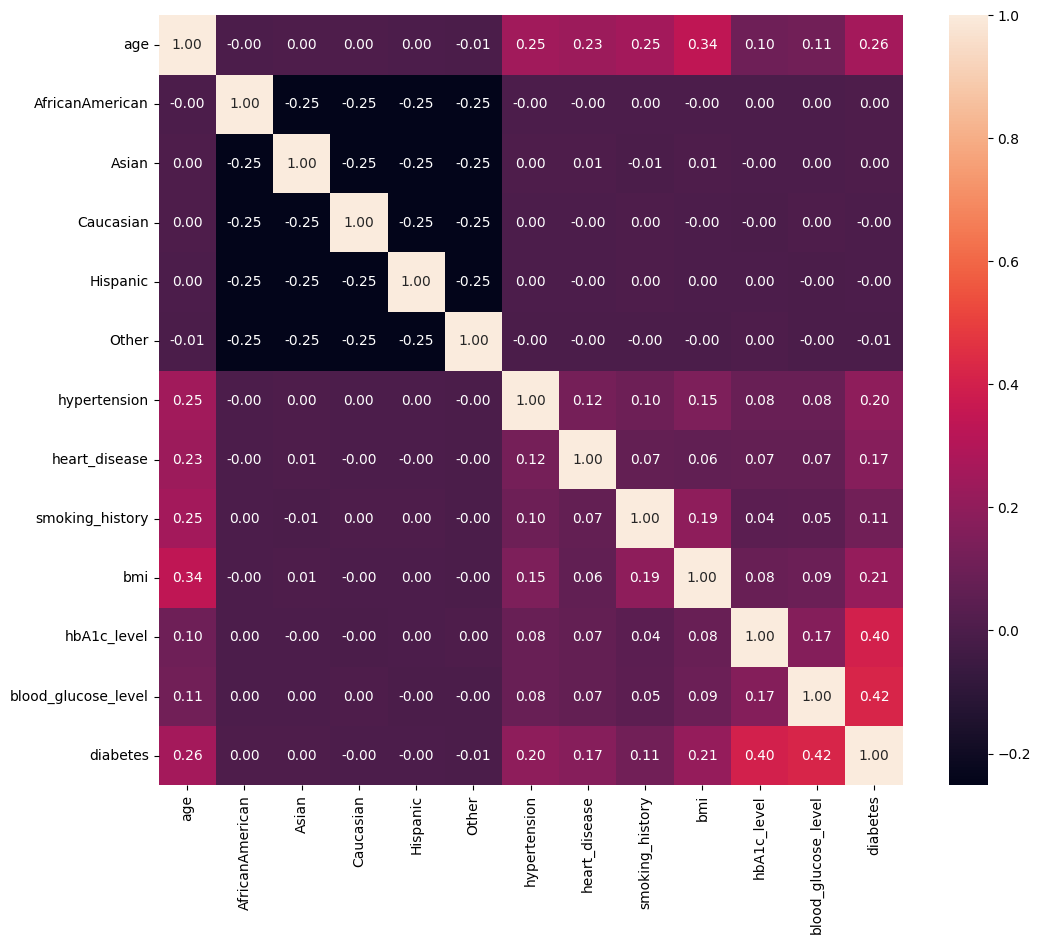

In [9]:
dff = df.copy()
ordinal_inst = OrdinalEncoder(categories=[['No Info','No smoking', 'past smoking', 'Smoking']])
dff[['smoking_history']] = ordinal_inst.fit_transform(dff[['smoking_history']])
plt.figure(figsize=(12, 10))
sns.heatmap(dff.select_dtypes(include='number').corr(), annot=True, fmt='.2f')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

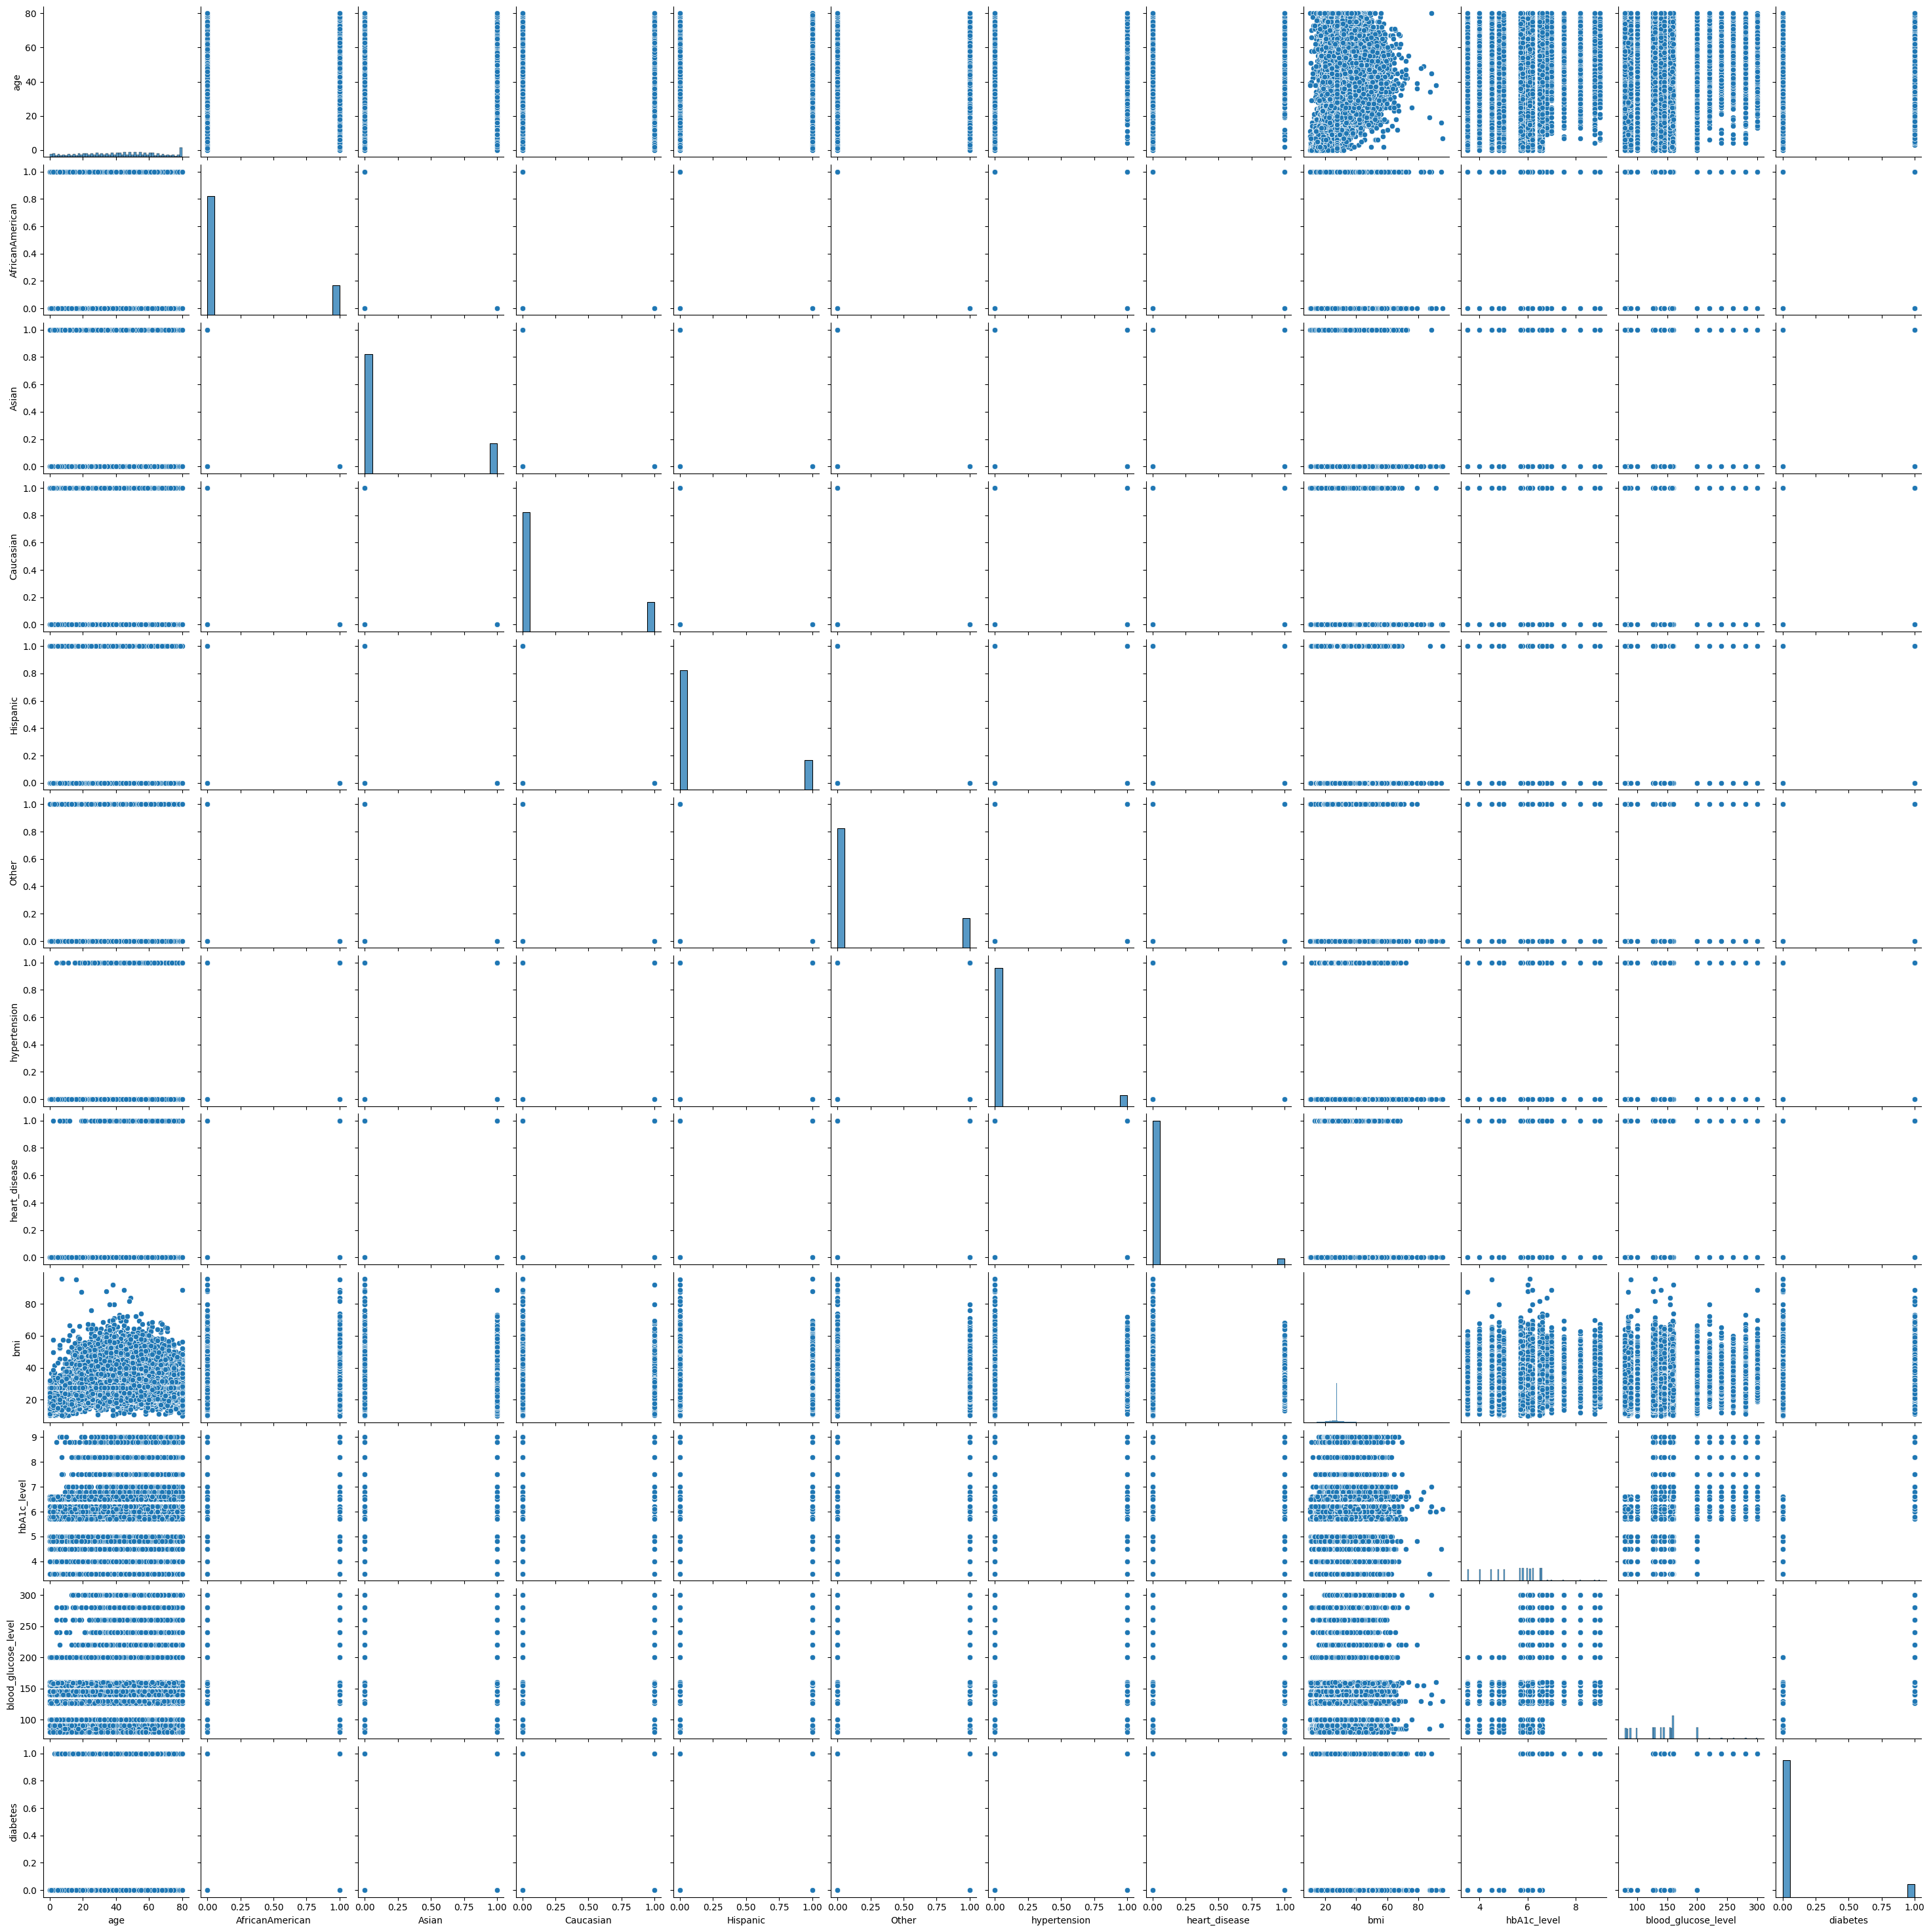

In [19]:
# MultiVariate
sns.pairplot(df.select_dtypes(include='number',hue="diabetes"))

In [20]:
# Questions

In [21]:
#1- what top 10 location have diabetes
top_10_location = df[df["diabetes"]==1]["location"].value_counts().head(10)
top_10_location

location
Delaware        200
Kansas          199
Illinois        195
Montana         194
Rhode Island    192
Kentucky        192
Hawaii          186
New Mexico      184
Mississippi     184
Maryland        184
Name: count, dtype: int64

In [22]:
# 2-Who has diabetes more, men or women?
top = df[df["diabetes"]==1]["gender"].value_counts()
top


gender
Female    4461
Male      4039
Name: count, dtype: int64

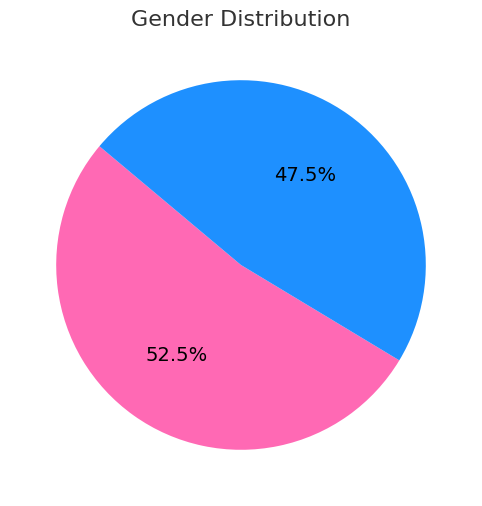

In [23]:
colors = ['#FF69B4', '#1E90FF']

plt.figure(figsize=(8, 6))
plt.pie(top, autopct='%1.1f%%', startangle=140, colors= ['#FF69B4', '#1E90FF'], textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=16, color='#333')
plt.show()




In [24]:
# 3-Diabetes is more than one year old
top_year = df[df["diabetes"]==1]["year"].value_counts()
top_year


year
2019    6727
2016     765
2015     759
2018     243
2020       3
2022       2
2021       1
Name: count, dtype: int64

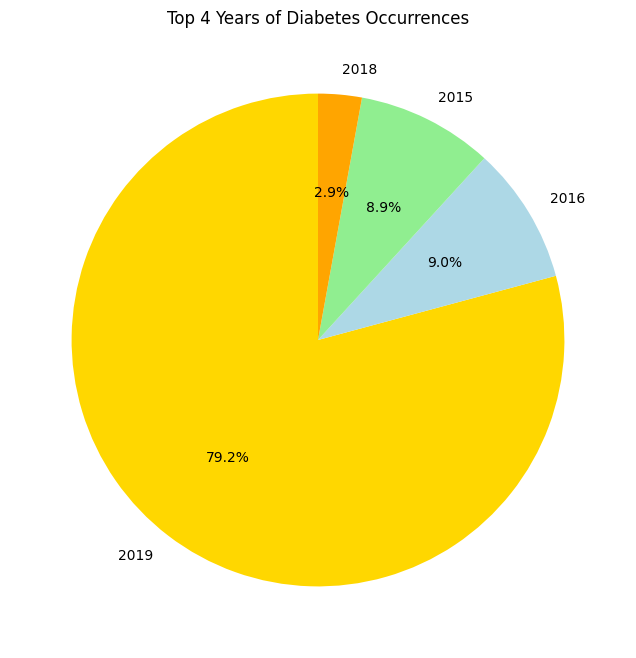

In [25]:
top_year = top_year.head(4)
years = top_year.index.astype(str) 
values = top_year.values

plt.figure(figsize=(8, 8))
plt.pie(values, labels=years, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'orange'])
plt.title("Top 4 Years of Diabetes Occurrences")
plt.show()


In [26]:
#4)Who is the age of people who have the most diabetes?

top_age = df[df["diabetes"]==1]["age"].value_counts()
top_age

age
80    1024
62     258
61     250
66     241
67     236
      ... 
6        4
11       2
8        1
3        1
5        1
Name: count, Length: 78, dtype: int64

<ipython-input-27-7409628d0f14>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_distribution = top_age.groupby(age_groups).sum()


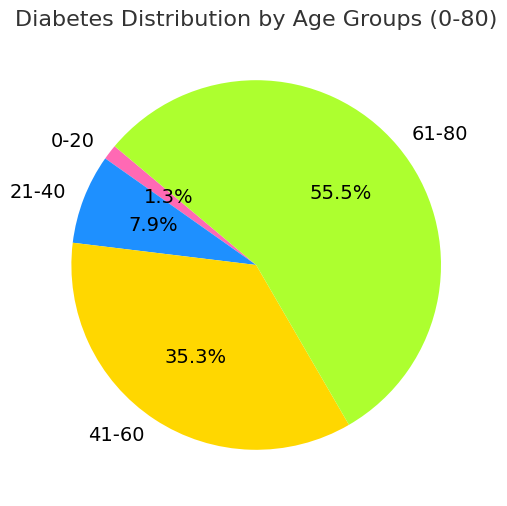

In [27]:
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '21-40', '41-60', '61-80']

age_groups = pd.cut(top_age.index, bins=bins, labels=labels, right=True)

age_group_distribution = top_age.groupby(age_groups).sum()

plt.figure(figsize=(8, 6))
plt.pie(
    age_group_distribution,
    labels=age_group_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FF69B4', '#1E90FF', '#FFD700', '#ADFF2F'],
    textprops={'fontsize': 14}
)
plt.title('Diabetes Distribution by Age Groups (0-80)', fontsize=16, color='#333')
plt.show()


In [10]:
# Does smoking lead to diabetes?
top_smoking_history = df[df["diabetes"]==1]["smoking_history"].value_counts()
top_smoking_history

smoking_history
No smoking      3346
past smoking    2752
No Info         1454
Smoking          948
Name: count, dtype: int64

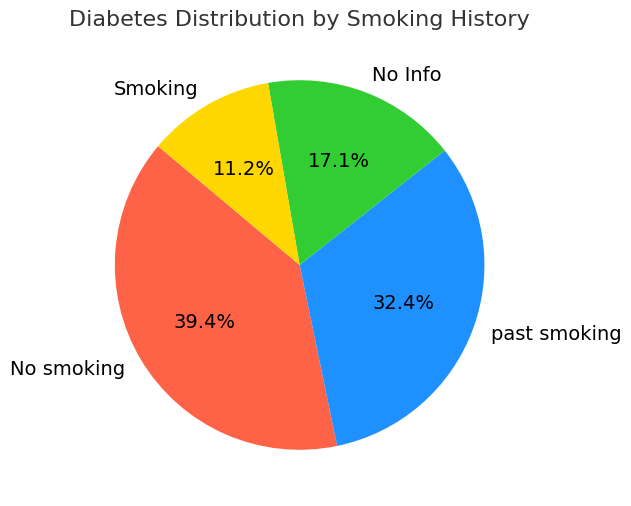

In [12]:
plt.figure(figsize=(8, 6))
plt.pie(
    top_smoking_history,
    labels=top_smoking_history.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FF6347', '#1E90FF', '#32CD32','#FFD700'],  
    textprops={'fontsize': 14}
)
plt.title('Diabetes Distribution by Smoking History', fontsize=16, color='#333')
plt.show()


In [21]:
# drop unimportant features
df.drop(["AfricanAmerican","Asian","Caucasian","Hispanic","Other","year","location"],axis=1 ,inplace=True )

### 3) Pre-Processing Mind Map:

* a) Detect & Handle Duplicates

* b) train_test_split

* c) Detect & Handle NaNs

* d) Detect & Handle Outliers

* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* f) Imbalanced: X_train_resampled

* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

# check dublicated

In [22]:
# check duplicates
df.duplicated().sum()

4066

In [23]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True , drop=True)

In [24]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.911595
1    0.088405
Name: proportion, dtype: float64

In [25]:
# train_test split
X  = df.drop(["diabetes"],axis=1 )
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.2 ,stratify=y ,random_state=42)

In [17]:
# stratify=y is done ? 
y_train.value_counts(normalize=True)

diabetes
0    0.914986
1    0.085014
Name: proportion, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

diabetes
0    0.914987
1    0.085013
Name: proportion, dtype: float64

In [19]:
# check nans
df.isna().sum()

year                   0
gender                 0
age                    0
location               0
AfricanAmerican        0
Asian                  0
Caucasian              0
Hispanic               0
Other                  0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X)


In [29]:
gender_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encod",OneHotEncoder(drop='first', sparse_output=False))
])

age_hba_gluc_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scale",StandardScaler())
])

smoking_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encod",OrdinalEncoder(categories=[["No Info","No smoking","past smoking","Smoking"]]))
])
bmi_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("handle_outliers",LogTransformer()),
    ("scale",RobustScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ("gender_pip",gender_pip,["gender"]),
    ("age_hba_gluc_pip",age_hba_gluc_pip,["age","hbA1c_level","blood_glucose_level"]),
    ("smoking_pip",smoking_pip,["smoking_history"]),
    ("bmi_pip",bmi_pip,["bmi"])
])
preprocessor

ColumnTransformer(transformers=[('gender_pip',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encod',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['gender']),
                                ('age_hba_gluc_pip',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['age', 'hbA1c_level', 'blood_glucose_level']),
                                ('smoking_pip',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encod',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'Info',
                                                                              'No '
                                                                              'smoking',
                                                                              'past '
                                                                              'smoking',
                                                                              'Smoking']]))]),
                                 ['smoking_history']),
                                ('bmi_pip',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransformer()),
                                                 ('scale', RobustScaler())]),
                                 ['bmi'])])

In [30]:
# preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [27]:
X_train_scaled

array([[ 0.        ,  0.        , -0.39500382, ..., -1.42356369,
         2.        , -1.28162765],
       [ 1.        ,  0.        , -1.81634497, ..., -1.30070386,
         0.        , -2.68174248],
       [ 0.        ,  0.        ,  1.02633734, ..., -0.93212437,
         0.        , -0.59837546],
       ...,
       [ 0.        ,  0.        , -0.12850235, ..., -0.93212437,
         1.        ,  0.70245625],
       [ 0.        ,  0.        ,  0.18241603, ...,  0.49304966,
         2.        ,  0.69404   ],
       [ 1.        ,  0.        , -1.59426041, ..., -0.19496539,
         1.        ,  0.32443529]])

In [42]:
# the model is underfit
log_reg = LogisticRegression(random_state=42, C=1, max_iter=200, warm_start=True,class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)
from sklearn.metrics import f1_score
y_train_pred = log_reg.predict(X_train_scaled)
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")

Train Accuracy: 0.8822058584519985
Validation Accuracy: 0.882068336104617
the valid precision :0.40994596073602846
the valid recall :0.8813235294117647
the valid f1_score :0.5595966198235212


### Underfitting Solutions:



* 1) More Complex Model



* 2) Extract More Features (PolynomialFeatures)



* 3) descrease constrains

In [31]:
gender_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encod",OneHotEncoder(drop='first', sparse_output=False))
])

age_hba_gluc_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("poly", PolynomialFeatures(degree=5, include_bias=False)),
    ("scale",StandardScaler())
])

smoking_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encod",OrdinalEncoder(categories=[["No Info","No smoking","past smoking","Smoking"]]))
])
bmi_pip = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("handle_outliers",LogTransformer()),
    ("poly", PolynomialFeatures(degree=5, include_bias=False)),
    ("scale",RobustScaler())
])
preprocessor_poly = ColumnTransformer(transformers=[
    ("gender_pip",gender_pip,["gender"]),
    ("age_hba_gluc_pip",age_hba_gluc_pip,["age","hbA1c_level","blood_glucose_level"]),
    ("smoking_pip",smoking_pip,["smoking_history"]),
    ("bmi_pip",bmi_pip,["bmi"])
])
preprocessor_poly

ColumnTransformer(transformers=[('gender_pip',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encod',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['gender']),
                                ('age_hba_gluc_pip',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False)),
                                                 ('scale', StandardScaler())]),
                                 ['age', 'hbA1c_le...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encod',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'Info',
                                                                              'No '
                                                                              'smoking',
                                                                              'past '
                                                                              'smoking',
                                                                              'Smoking']]))]),
                                 ['smoking_history']),
                                ('bmi_pip',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransformer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False)),
                                                 ('scale', RobustScaler())]),
                                 ['bmi'])])

In [32]:
X_train_scaled_poly = preprocessor_poly.fit_transform(X_train)
X_test_scaled_poly = preprocessor_poly.transform(X_test)

In [51]:
log_reg_poly = LogisticRegression(C=1,max_iter=1000,warm_start=False, class_weight='balanced')
log_reg_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = log_reg_poly.predict(X_train_scaled_poly) 
y_valid_pred = cross_val_predict(log_reg_poly, X_train_scaled_poly, y_train, cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")

Train Accuracy: 0.8874317076524936
Validation Accuracy: 0.8876692462525161
the valid precision :0.40994596073602846
the valid recall :0.8813235294117647
the valid f1_score :0.5595966198235212


In [58]:
# Linear svc
from sklearn.metrics import f1_score
linear_svc_clf = LinearSVC(C=.01, random_state=42, max_iter=100000, class_weight='balanced', loss='hinge')
linear_svc_clf.fit(X_train_scaled_poly, y_train)
y_train_pred = linear_svc_clf.predict(X_train_scaled_poly) # train
y_valid_pred = cross_val_predict(linear_svc_clf, X_train_scaled_poly, y_train, cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")
confusion_matrix(y_train, y_valid_pred)

Train Accuracy: 0.8800930151149562
Validation Accuracy: 0.881030667483466
the valid precision :0.4096112886048988
the valid recall :0.905
the valid f1_score :0.563966275659824


array([[64317,  8870],
       [  646,  6154]])

In [61]:
# more complex models

In [60]:
# SVM
from sklearn.metrics import f1_score
svc_clf = SVC(C=100, random_state=42, max_iter=10000, class_weight='balanced')
svc_clf.fit(X_train_scaled , y_train)
y_train_pred = svc_clf.predict(X_train_scaled)
y_valid_pred = cross_val_predict(svc_clf,X_train_scaled,y_train,cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Accuracy: 0.7434458099441159
Validation Accuracy: 0.8306724842786953
the valid precision :0.30880018144704013
the valid recall :0.8008823529411765
the valid f1_score :0.4457357996398756


In [72]:
# KNN
from sklearn.metrics import f1_score
knn_clf = KNeighborsClassifier(n_neighbors=101)
knn_clf.fit(X_train_scaled , y_train)
y_train_pred = knn_clf.predict(X_train_scaled)
y_valid_pred = cross_val_predict(knn_clf,X_train_scaled,y_train,cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")


Train Accuracy: 0.9594772434101658
Validation Accuracy: 0.9582915293105919
the valid precision :0.9972253052164262
the valid recall :0.5296978629329403
the valid f1_score :0.6918856482818366


In [67]:
# DecisionTreeClassifier
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(max_depth=7,  min_samples_split=20, min_samples_leaf=20 , class_weight = "balanced",random_state=42)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(dt, X_train_scaled, y_train, cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")


Train Accuracy: 0.8615650043132009
Validation Accuracy: 0.8879567929788591
the valid precision :0.4258573388203018
the valid recall :0.9130882352941176
the valid f1_score :0.5808231992516371


In [68]:
# RandomForestClassifier
from sklearn.metrics import f1_score
rnd_clf = RandomForestClassifier(n_estimators=500 , max_leaf_nodes=10 , n_jobs=-1 , random_state=42)
rnd_clf.fit(X_train_scaled,y_train)
y_train_pred = rnd_clf.predict(X_train_scaled)
y_valid_pred = cross_val_predict(rnd_clf,X_train_scaled,y_train,cv=3)
precision = precision_score(y_train,y_valid_pred)
recall = recall_score(y_train,y_valid_pred)
f1_score = f1_score(y_train,y_valid_pred)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"the valid precision :{precision}")
print(f"the valid recall :{recall}")
print(f"the valid f1_score :{f1_score}")

Train Accuracy: 0.9718079187868028
Validation Accuracy: 0.9718079187868028
the valid precision :1.0
the valid recall :0.6683823529411764
the valid f1_score :0.8012340237990303


# under sample

In [69]:
# LogisticRegression
import time
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.metrics import f1_score
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",LogisticRegression( C=.000001, max_iter=1000,random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8925950466950879
Validation Accuracy: 0.8921449735582032
valid_precision_score:0.4319350271961851
valid_recall_score:0.8525
valid_f1_score:0.5733643242173978
confusion_matrix :
 [[65563  7624]
 [ 1003  5797]]
Time taken: 0.03 minutes


In [72]:
# LogisticRegression with more feature
import time
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.metrics import f1_score
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",LogisticRegression( C=.000001, max_iter=1000,random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9291134809406528
Validation Accuracy: 0.9294760398564766
valid_precision_score:0.5683292064615022
valid_recall_score:0.7088235294117647
valid_f1_score:0.6308487664419868
confusion_matrix :
 [[69526  3661]
 [ 1980  4820]]
Time taken: 0.05 minutes


In [70]:
# SGDClassifier
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",SGDClassifier(alpha=0.1, penalty='l2', max_iter=1000,  random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8837561103679348
Validation Accuracy: 0.8839186367784765
valid_precision_score:0.4143280700544715
valid_recall_score:0.8836764705882353
valid_f1_score:0.564145894944374
confusion_matrix :
 [[64693  8494]
 [  791  6009]]
Time taken: 0.02 minutes


In [71]:
# SGDClassifier with more feature
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",SGDClassifier(alpha=0.1, penalty='l2', max_iter=1000,  random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.892320002000325
Validation Accuracy: 0.8948454123795117
valid_precision_score:0.4398117014122394
valid_recall_score:0.8655882352941177
valid_f1_score:0.5832631422484268
confusion_matrix :
 [[65690  7497]
 [  914  5886]]
Time taken: 0.04 minutes


In [89]:
# KNeighborsClassifier
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",KNeighborsClassifier(n_neighbors=101,leaf_size=50))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


Train Accuracy: 0.87191668646155
Validation Accuracy: 0.8741545501143936
valid_precision_score:0.39581472502232995
valid_recall_score:0.9123529411764706
valid_f1_score:0.552104654267153
confusion_matrix :
 [[63717  9470]
 [  596  6204]]
Time taken: 0.38 minutes


In [100]:
# svc
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",SVC(C=40, random_state=42, max_iter=10000))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

Train Accuracy: 0.8743545826196757
Validation Accuracy: 0.8833185392626302
valid_precision_score:0.4160869277148347
valid_recall_score:0.9235294117647059
valid_f1_score:0.5736993559585255
confusion_matrix :
 [[64374  8813]
 [  520  6280]]
Time taken: 0.59 minutes


In [76]:
# DecisionTreeClassifier
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",DecisionTreeClassifier(max_depth=10,  min_samples_split=20, min_samples_leaf=20,random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8865690674734644
Validation Accuracy: 0.8975708552639804
valid_precision_score:0.4490750895664254
valid_recall_score:0.903235294117647
valid_f1_score:0.5998925623870685
confusion_matrix :
 [[65652  7535]
 [  658  6142]]
Time taken: 0.02 minutes


In [77]:
# RandomForestClassifier
start_time = time.time()
undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=3, random_state=42))
])

undersampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = undersampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(undersampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8920699613687224
Validation Accuracy: 0.8952954855163964
valid_precision_score:0.4439780892082237
valid_recall_score:0.9177941176470589
valid_f1_score:0.5984561538092728
confusion_matrix :
 [[65371  7816]
 [  559  6241]]
Time taken: 0.90 minutes


# gridsearch

In [88]:
#logisticregression
params_grid = {"preprocessor_poly__age_hba_gluc_pip__poly__degree":[3,5,7,10],
               "preprocessor_poly__bmi_pip__poly__degree":[3,5,7,10],
               "model__penalty":["l2"],
               "model__C":[.01,.001,.0001,.00001,.000001],
               "model__max_iter":[500,1000,1500,2000],

                }
undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_poly', preprocessor_poly),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",LogisticRegression( C=.000001, max_iter=1000,random_state=42))
])


logistic_grid = GridSearchCV(undersampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_logistic_model
start_time = time.time()

logistic_grid.fit(X_train,y_train)
best_logistic_model = logistic_grid.best_estimator_
y_train_pred = best_logistic_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_logistic_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {logistic_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


best_hyperparamaters: {'model__C': 1e-06, 'model__max_iter': 500, 'model__penalty': 'l2', 'preprocessor_poly__age_hba_gluc_pip__poly__degree': 7, 'preprocessor_poly__bmi_pip__poly__degree': 10}
Train Accuracy: 0.9344893545201095
Validation Accuracy: 0.934914423593834
valid_precision_score:0.6034796156842379
valid_recall_score:0.6835294117647058
valid_f1_score:0.6410150324093228
confusion_matrix :
 [[70133  3054]
 [ 2152  4648]]
Time taken: 3.44 minutes


In [90]:
#KNeighborsClassifier
params_grid = {
               "model__n_neighbors":[77,101,151],
               "model__leaf_size" :[30,50],
               "model__weights":["uniform","distance"]

                }
undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model",KNeighborsClassifier(n_neighbors=1000, leaf_size=50))
])


KNeighbors_grid = GridSearchCV(undersampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_KNeighbors_model
start_time = time.time()

KNeighbors_grid.fit(X_train,y_train)
best_KNeighbors_model = KNeighbors_grid.best_estimator_
y_train_pred = best_KNeighbors_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_KNeighbors_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {KNeighbors_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


best_hyperparamaters: {'model__leaf_size': 30, 'model__n_neighbors': 77, 'model__weights': 'distance'}
Train Accuracy: 0.8917699126107993
Validation Accuracy: 0.87760511083051
valid_precision_score:0.40299766415779914
valid_recall_score:0.9133823529411764
valid_f1_score:0.5592472537367189
confusion_matrix :
 [[63986  9201]
 [  589  6211]]
Time taken: 1.02 minutes


In [92]:
# DecisionTreeClassifier
params_grid = {
    "model__max_depth":[3,5,7,10,20],
    'model__max_leaf_nodes':[5, 10, 20],
    "model__min_samples_split":[3,5,7,10,20,30],
    "model__min_samples_leaf":[3,5,10,20,30],
}

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(random_state=42))
])


DT_grid = GridSearchCV(
    undersampling_polyfeats_pipeline,
    params_grid,
    cv=3,
    n_jobs=-1,
    scoring='f1',
    error_score='raise'      
)


start_time = time.time()
DT_grid.fit(X_train, y_train)
best_DT_model = DT_grid.best_estimator_


y_train_pred = best_DT_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_DT_model, X_train, y_train, cv=cv)


print(f"best_hyperparamaters: {DT_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train, y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train, y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train, y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


best_hyperparamaters: {'model__max_depth': 3, 'model__max_leaf_nodes': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3}
Train Accuracy: 0.9718079187868028
Validation Accuracy: 0.9718079187868028
valid_precision_score:1.0
valid_recall_score:0.6683823529411764
valid_f1_score:0.8012340237990303
confusion_matrix :
 [[73187     0]
 [ 2255  4545]]
Time taken: 1.79 minutes


In [75]:
# DecisionTreeClassifier
params_grid = {
    "model__max_depth":[3,5,7,10,20],
    'model__max_leaf_nodes':[5, 10, 20],
    "model__min_samples_split":[3,5,7,10,20,30],
    "model__min_samples_leaf":[3,5,10,20,30],
}

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(random_state=42))
])


DT_grid = GridSearchCV(
    undersampling_polyfeats_pipeline,
    params_grid,
    cv=3,
    n_jobs=-1,
    scoring='f1',
    error_score='raise'      
)


start_time = time.time()
DT_grid.fit(X_train, y_train)
best_DT_model = DT_grid.best_estimator_


y_train_pred = best_DT_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_DT_model, X_train, y_train, cv=cv)


print(f"best_hyperparamaters: {DT_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train, y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train, y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train, y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


best_hyperparamaters: {'model__max_depth': 3, 'model__max_leaf_nodes': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3}
Train Accuracy: 0.9708653106961835
Validation Accuracy: 0.9708653106961835
valid_precision_score:1.0
valid_recall_score:0.6704495210022108


TypeError: 'numpy.float64' object is not callable

In [76]:
best_DT_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gender_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('age_hba_gluc_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'hbA1c_level',
                                                   'blood_glucose_level...
                                                                                               'Smoking']]))]),
                                                  ['smoking_history']),
                                                 ('bmi_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['bmi'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                                        min_samples_leaf=3, min_samples_split=3,
                                        random_state=42))])

#  Oversampling

In [44]:
import time
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.metrics import f1_score

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5,random_state=42)),
])

oversampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gender_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('age_hba_gluc_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'hbA1c_level',
                                                   'blood_glucose_level...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OrdinalEncoder(categories=[['No '
                                                                                               'Info',
                                                                                               'No '
                                                                                               'smoking',
                                                                                               'past '
                                                                                               'smoking',
                                                                                               'Smoking']]))]),
                                                  ['smoking_history']),
                                                 ('bmi_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('handle_outliers',
                                                                   LogTransformer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['bmi'])])),
                ('solve_imbalanced', SMOTE(random_state=42))])

In [45]:
X_train_df, y_train_df = oversampling_pipeline.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(X_train_df)
y_train_df = pd.DataFrame(y_train_df)
X_train_df.duplicated().sum()

496

In [ ]:
y_train_df.value_counts()

In [ ]:
y_train_df.value_counts()

In [47]:
# LogisticRegression with  PolynomialFeatures and oversampling
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_poly', preprocessor_poly),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",LogisticRegression( C=.000001, max_iter=1000,random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9150064497635086
Validation Accuracy: 0.9179121007987283
valid_precision_score:0.5242475752424758
valid_recall_score:0.7727339719970523
valid_f1_score:0.6246872393661385
confusion_matrix :
 [[65204  4758]
 [ 1542  5243]]
Time taken: 0.11 minutes


In [49]:
# SGDClassifier with  PolynomialFeatures
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_ploy', preprocessor_poly),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",SGDClassifier(alpha=0.1, penalty='l2', max_iter=1000,  random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8896504097880047
Validation Accuracy: 0.8884516658631608
valid_precision_score:0.4351161771153003
valid_recall_score:0.8776713338246132
valid_f1_score:0.5817986419813395
confusion_matrix :
 [[62231  7731]
 [  830  5955]]
Time taken: 0.09 minutes


In [50]:
# Naive Bayes
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_ploy', preprocessor_poly),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",GaussianNB())
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9084394178274069
Validation Accuracy: 0.908765163459158
valid_precision_score:0.4896912114014252
valid_recall_score:0.7596168017686072
valid_f1_score:0.5954939341421144
confusion_matrix :
 [[64591  5371]
 [ 1631  5154]]
Time taken: 0.07 minutes


In [51]:
# KNeighborsClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",KNeighborsClassifier(n_neighbors=101))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


Train Accuracy: 0.8821452304324598
Validation Accuracy: 0.8761254511577
valid_precision_score:0.40959213498073604
valid_recall_score:0.9087693441414886
valid_f1_score:0.5646778698658363
confusion_matrix :
 [[61074  8888]
 [  619  6166]]
Time taken: 0.69 minutes


In [52]:
# svc
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",SVC(C=100,max_iter=10000,random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

Train Accuracy: 0.798207096042842
Validation Accuracy: 0.7980637679648716
valid_precision_score:0.2797188653486373
valid_recall_score:0.8153279292557112
valid_f1_score:0.4165348994804608
confusion_matrix :
 [[55717 14245]
 [ 1253  5532]]
Time taken: 9.98 minutes


In [53]:
# DecisionTreeClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",DecisionTreeClassifier(max_depth=7,  min_samples_split=15, min_samples_leaf=15,random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.8899891852450259
Validation Accuracy: 0.8804122636715441
valid_precision_score:0.41947641160239585
valid_recall_score:0.9186440677966101
valid_f1_score:0.5759563851413786
confusion_matrix :
 [[61336  8626]
 [  552  6233]]
Time taken: 0.05 minutes


In [54]:
# RandomForestClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=3, random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9118923215239684
Validation Accuracy: 0.9103287424915631
valid_precision_score:0.49600329625051504
valid_recall_score:0.8871039056742815
valid_f1_score:0.6362579281183933
confusion_matrix :
 [[63846  6116]
 [  766  6019]]
Time taken: 8.80 minutes


# gridsearch

In [57]:
#logisticregression
params_grid = {"preprocessor_ploy__age_hba_gluc_pip__poly__degree":[3,5,7,10],
               "preprocessor_ploy__bmi_pip__poly__degree":[3,5,7,10],
               "model__penalty":["l2"],
               "model__C":[.01,.001,.0001,.00001,.000001],
               "model__max_iter":[500,1000,1500,2000],

                }
oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_ploy', preprocessor_poly),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",LogisticRegression( C=.000001, max_iter=1000,random_state=42))
])


logistic_grid = GridSearchCV(oversampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_logistic_model
start_time = time.time()

logistic_grid.fit(X_train,y_train)
best_logistic_model = logistic_grid.best_estimator_
y_train_pred = best_logistic_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_logistic_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {logistic_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


NameError: name 'preprocessor_ploy' is not defined

In [ ]:
import time

In [ ]:
#KNeighborsClassifier
params_grid = {
               "model__n_neighbors":[77,101,151],
               "model__leaf_size" :[30,50],
               "model__weights":["uniform","distance"]

                }
oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",KNeighborsClassifier(n_neighbors=1000, leaf_size=50))
])


KNeighbors_grid = RandomizedSearchCV(oversampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_KNeighbors_model
start_time = time.time()

KNeighbors_grid.fit(X_train,y_train)
best_KNeighbors_model = KNeighbors_grid.best_estimator_
y_train_pred = best_KNeighbors_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_KNeighbors_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {KNeighbors_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


In [ ]:
#DecisionTreeClassifier
params_grid = {
               "model__max_depth":[3,5,7,10,20],
               'model__max_leaf_nodes':[5, 10, 20],
               "model__min_samples_split":[3,5,7,10,20,30],
               "model__min_samples_leaf":[3,5,10,20,30],

                }
oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_ploy', preprocessor_ploy),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",DecisionTreeClassifier(max_depth=7,  min_samples_split=15, min_samples_leaf=15,random_state=42))
])


DT_grid = GridSearchCV(oversampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_KNeighbors_model
start_time = time.time()

DT_grid.fit(X_train,y_train)
best_DT_model = DT_grid.best_estimator_
y_train_pred = best_DT_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_DT_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {DT_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


In [ ]:
#RandomForestClassifier
params_grid = {
               "model__max_depth":[3,5,7,10,20],
               'model__max_leaf_nodes':[5, 10, 20],
               "model__min_samples_split":[3,5,7,10,20,30],
               "model__min_samples_leaf":[3,5,10,20,30],
               "model__n_estimators":[500,1000,1500],

                }
oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('preprocessor_ploy', preprocessor_ploy),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=3, random_state=42))
])


RandomF_grid = GridSearchCV(oversampling_polyfeats_pipeline,params_grid,cv=3,n_jobs=-1,scoring='f1')
# the best_KNeighbors_model
start_time = time.time()

RandomF_grid.fit(X_train,y_train)
best_RandomF_model = RandomF_grid.best_estimator_
y_train_pred = best_RandomF_model.predict(X_train)
cv = StratifiedKFold(n_splits=5)
y_valid_pred = cross_val_predict(best_RandomF_model, X_train, y_train, cv=cv)
print(f"best_hyperparamaters: {RandomF_grid.best_params_}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")


In [56]:
# GradientBoostingClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,n_iter_no_change=10, random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9666175876581495
Validation Accuracy: 0.9663700209780187
valid_precision_score:0.8683841570276901
valid_recall_score:0.7302873986735445
valid_f1_score:0.7933712272836442
confusion_matrix :
 [[69211   751]
 [ 1830  4955]]
Time taken: 3.26 minutes


In [58]:
# AdaBoostClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9663700209780187
Validation Accuracy: 0.9659660963946474
valid_precision_score:0.862680340691813
valid_recall_score:0.7314664701547531
valid_f1_score:0.7916733131280905
confusion_matrix :
 [[69172   790]
 [ 1822  4963]]
Time taken: 9.30 minutes


In [62]:
from xgboost import XGBClassifier


In [65]:
# XGBClassifier
start_time = time.time()
oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model",XGBClassifier(n_estimators=100,  max_depth=3,           
    subsample=0.8,              
    colsample_bytree=0.8,     
    random_state=42,
    use_label_encoder=False,     
    eval_metric="logloss"))
])

oversampling_pipeline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = oversampling_pipeline.predict(X_train) # train
y_valid_pred = cross_val_predict(oversampling_pipeline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9629301471067273
Validation Accuracy: 0.9638552647009003
valid_precision_score:0.8301234567901234
valid_recall_score:0.7432571849668386
valid_f1_score:0.7842923794712287
confusion_matrix :
 [[68930  1032]
 [ 1742  5043]]
Time taken: 0.07 minutes


In [ ]:
# the best model (logistic - random forest - adabosting - gradiantbosting)

In [79]:
# Using Voting
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score


In [82]:
voting_cls = VotingClassifier(estimators=[
    ("XGB",XGBClassifier(n_estimators=100,max_depth=3,subsample=0.8,colsample_bytree=0.8,random_state=42,use_label_encoder=False,eval_metric="logloss")),
    ("RF",RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=3, random_state=42)),
    ("AB", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ("GB",GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,n_iter_no_change=10, random_state=42))
    ],
    voting="soft",
    n_jobs=-1
      )

voting_pipline = Imb_Pipeline(steps =[
    ("preprocessor",preprocessor),
    ("solve_imbalanced",SMOTE(random_state=42)),
    ("model",voting_cls)

])
voting_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gender_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('age_hba_gluc_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'hbA1c_level',
                                                   'blood_glucose_level...
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      random_state=42)),
                                              ('AB',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GB',
                                               GradientBoostingClassifier(n_estimators=200,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [92]:
voting_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gender_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('age_hba_gluc_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'hbA1c_level',
                                                   'blood_glucose_level...
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      random_state=42)),
                                              ('AB',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GB',
                                               GradientBoostingClassifier(n_estimators=200,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [83]:
# VotingClassifier
start_time = time.time()

voting_pipline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = voting_pipline.predict(X_train) # train
y_valid_pred = cross_val_predict(voting_pipline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9556985940818533
Validation Accuracy: 0.9557507133829335
valid_precision_score:0.7332415691672401
valid_recall_score:0.7851142225497421
valid_f1_score:0.7582918149466191
confusion_matrix :
 [[68024  1938]
 [ 1458  5327]]
Time taken: 11.34 minutes


In [84]:
# Using Stacking
from sklearn.ensemble import StackingClassifier# Stacking


In [88]:
stacking_cls = StackingClassifier(estimators=[
    ("XGB",XGBClassifier(n_estimators=100,max_depth=3,subsample=0.8,colsample_bytree=0.8,random_state=42,use_label_encoder=False,eval_metric="logloss")),
    ("RF",RandomForestClassifier(n_estimators=1000,max_depth=10,min_samples_split=3, random_state=42)),
    ("AB", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ("GB",GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,n_iter_no_change=10, random_state=42))
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,n_iter_no_change=10, random_state=42),
    cv =3 , n_jobs=-1
    )

stacking_pipline = Imb_Pipeline(steps =[
    ("preprocessor",preprocessor),
    ("solve_imbalanced",SMOTE(random_state=42)),
    ("model",stacking_cls)

])
stacking_pipline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gender_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender']),
                                                 ('age_hba_gluc_pip',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'hbA1c_level',
                                                   'blood_glucose_level...
                                                 RandomForestClassifier(max_depth=10,
                                                                        min_samples_split=3,
                                                                        n_estimators=1000,
                                                                        random_state=42)),
                                                ('AB',
                                                 AdaBoostClassifier(n_estimators=1000,
                                                                    random_state=42)),
                                                ('GB',
                                                 GradientBoostingClassifier(n_estimators=200,
                                                                            n_iter_no_change=10,
                                                                            random_state=42))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=200,
                                                                               n_iter_no_change=10,
                                                                               random_state=42),
                                    n_jobs=-1))])

In [89]:
# Stacking
start_time = time.time()

stacking_pipline.fit(X_train,y_train)

cv = StratifiedKFold(n_splits=5)
y_train_pred = stacking_pipline.predict(X_train) # train
y_valid_pred = cross_val_predict(stacking_pipline, X_train, y_train, cv=cv) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")
print(f"valid_precision_score:{precision_score(y_train,y_valid_pred)}")
print(f"valid_recall_score:{recall_score(y_train,y_valid_pred)}")
print(f"valid_f1_score:{f1_score(y_train,y_valid_pred)}")
print(f"confusion_matrix :\n {confusion_matrix(y_train, y_valid_pred)}")

end_time = time.time()
print(f"Time taken: {(end_time - start_time) / 60:.2f} minutes")



Train Accuracy: 0.9695623281691792
Validation Accuracy: 0.9683766140696053
valid_precision_score:0.9311436485951722
valid_recall_score:0.6935887988209285
valid_f1_score:0.7949995776670327
confusion_matrix :
 [[69614   348]
 [ 2079  4706]]
Time taken: 31.61 minutes


# 5) PR Curve on Validation Data
* to determine threshold

Getting Voting Scores
Getting Stacking Scores


Text(0, 0.5, 'precision')

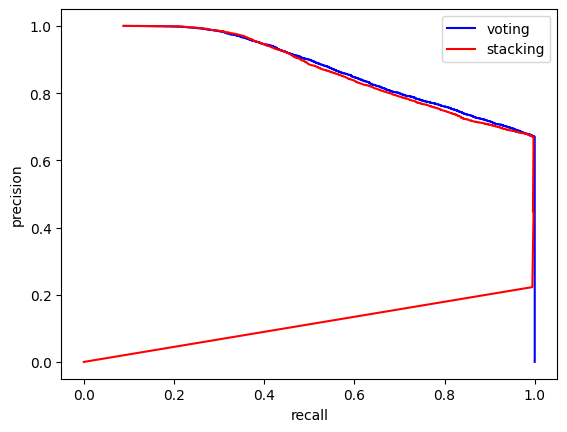

In [93]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipline, X_train, y_train, cv=3, method='predict_proba')
print("Getting Stacking Scores")
y_valid_stacking_prob = cross_val_predict(stacking_pipline, X_train, y_train, cv=3, method='predict_proba')
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])
precision_stacking_scores, recall_stacking_scores, stacking_thresholds = precision_recall_curve(y_train, y_valid_stacking_prob[:, 1])

plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='blue')
plt.plot(precision_stacking_scores[:-1], recall_stacking_scores[:-1], label='stacking', color='red')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision') # so we can pick threshold at precision = , Recall=

In [95]:
prt_frame = pd.DataFrame({'precsion':precision_stacking_scores[:-1], 'recall':recall_stacking_scores[:-1], 'threhold':stacking_thresholds})
px.line(prt_frame, x='precsion', y="recall", hover_data="threhold")

In [97]:
indx = np.argmax(recall_stacking_scores <= 0.95)
recall_95 = stacking_thresholds[indx]
y_stacking_threshold_pred = (y_valid_stacking_prob[:, 1] >= recall_95)
print(f"Accuracy: {accuracy_score(y_train, y_stacking_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_stacking_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_stacking_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_stacking_threshold_pred)}")
print(confusion_matrix(y_train, y_stacking_threshold_pred))

Accuracy: 0.8656103821647751
F1 Score: 0.5554310344827585
Precsion: 0.39250685348766373
Recall: 0.9495946941783345
[[59990  9972]
 [  342  6443]]


# Test Performance

In [99]:
y_stacking_test_pred = stacking_pipline.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_pred)}") # Test Recall

Test Accuracy: 0.9686767081878355
Test F1 Score: 0.7957866123003738
Test Precsion: 0.9390537289494787
Test Recall: 0.6904481132075472


In [100]:
confusion_matrix(y_test, y_stacking_test_pred)

array([[17415,    76],
       [  525,  1171]])

In [101]:
y_stacking_test_scores = stacking_pipline.predict_proba(X_test)
y_stacking_test_threshold_pred = (y_stacking_test_scores[:, 1] >= recall_95)
print(f"Test Accuracy: {accuracy_score(y_test, y_stacking_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_stacking_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_stacking_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_stacking_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.8609475165476624
Test F1 Score: 0.5476432689047135
Test Precsion: 0.3843407900999524
Test Recall: 0.9522405660377359


In [105]:
confusion_matrix(y_test, y_stacking_test_threshold_pred)

array([[14904,  2587],
       [   81,  1615]])

# save model

In [106]:
joblib.dump(stacking_pipline, 'stacking_pipeline_model.pkl')
print("Model saved as 'stacking_pipeline_model.pkl'")


Model saved as 'stacking_pipeline_model.pkl'


In [108]:
# save 
import joblib

model_with_threshold = {
    "model": stacking_pipline,
    "threshold": recall_95
}

joblib.dump(model_with_threshold, 'stacking_pipeline_with_threshold.pkl')
print("Model and threshold saved as 'stacking_pipeline_with_threshold.pkl'")


Model and threshold saved as 'stacking_pipeline_with_threshold.pkl'
